In [1]:
import os
import sys
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt


sys.path.append("/home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee")
from src.setup import setup_python, setup_pytorch
from src.dataset import MocaplabDataset

/home/self_supervised_learning_gr/self_supervised_learning/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
setup_python()

sys.version = 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
os.getcwd() = /home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee/data/mocaplab


In [3]:
setup_pytorch()

torch.__version__ = 1.12.1+cu113
torch.backends.cudnn.version() = 8302
torch.version.cuda = 11.3
DEVICE = cuda:0


device(type='cuda', index=0)

# MocaplabDataset

In [4]:
dataset = MocaplabDataset(path="Cassiopée",
                          padding=True)

ParserError: Header rows must have an equal number of columns.

In [ ]:
len(dataset)

116

In [ ]:
print(dataset.class_dict)

{'Mono': 0, 'Bi': 1}


In [ ]:
print(dataset.max_length)

100


In [ ]:
print(len(dataset.x))
print(dataset.x[:10])

116
['Monsieur.csv', 'Octobre.csv', 'Chiffre.csv', 'Œil.csv', 'Dizaine.csv', 'Route.csv', 'Sauter.csv', 'Medecin.csv', 'France.csv', 'Fromage.csv']


In [ ]:
print(len(dataset.y))
print(dataset.y[:10])

116
[0, 0, 1, 0, 1, 1, 1, 0, 0, 0]


In [ ]:
print(dataset.removed)

['Décembre.csv', 'Maîtresse.csv', 'Grand-mère.csv', 'Désolé.csv', 'Prénom.csv', 'Gâteau.csv', 'Sécurité.csv', 'Août.csv', 'Musée.csv', 'Mère.csv', 'Poupée.csv', 'Départ.csv', 'Grand-père.csv', 'Français.csv', 'Garçon.csv', '9ème.csv', '10ème.csv', 'Président.csv', 'Problème.csv', 'Tête.csv', 'Mardi.csv', 'Mars.csv', 'Père.csv', 'Pipi.csv', 'Bébé.csv']


In [ ]:
data_loader = DataLoader(dataset,
                         batch_size=10,
                         shuffle=False)

In [ ]:
# Retrieve batch data
batch_data, batch_label = next(iter(data_loader))
print(f"RGB batch shape: {batch_data.size()}")
print(f"Labels batch shape: {batch_label.size()}")

RGB batch shape: torch.Size([10, 100, 26])
Labels batch shape: torch.Size([10])


In [ ]:
# Retrieve individual data
data, label = batch_data[0], batch_label[0]

In [ ]:
print(label)
print(data.shape)
print(data)

tensor(0)
torch.Size([100, 26])
tensor([[856.0000,  34.2400,  -1.5900,  ...,  -1.2810, 109.3240,  -3.3520],
        [857.0000,  34.2800,  -1.6040,  ...,  -1.3030, 109.3280,  -3.4240],
        [858.0000,  34.3200,  -1.6220,  ...,  -1.3230, 109.3300,  -3.4940],
        ...,
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],
       dtype=torch.float64)


tensor([ -1.5900, 135.0970,  -4.7390, -17.6460, 143.6660,  -5.1400, -26.3840,
        115.4560,  -1.9130, -16.7850, 119.3310,  24.1090,  13.9540, 143.5920,
         -5.6320,  24.0640, 114.7240,  -3.2970,  15.4320, 120.4400,  23.1260,
         -1.2810, 109.3240,  -3.3520], dtype=torch.float64)
[-1.59, 135.097, -4.739, -17.646, 143.666, -5.14, -26.384, 115.456, -1.913, -16.785, 119.331, 24.109, 13.954, 143.592, -5.632, 24.064, 114.724, -3.297, 15.432, 120.44, 23.126, -1.281, 109.324, -3.352]


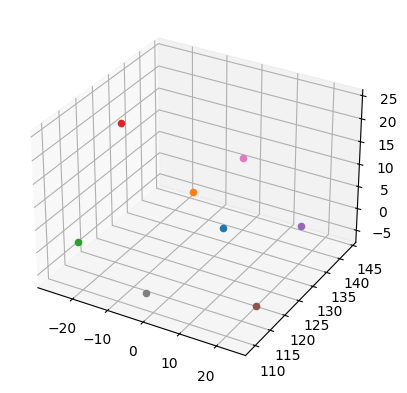

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Retrieve data at timestamp t
t = 0
data_t = data[0,2:] # Remove frame and timestamp
print(data_t)
data_t = data_t.tolist()
print(data_t)

for i in range(0, len(data_t)-1, 3):
    X = [data_t[i]]
    Y = [data_t[i + 1]]
    Z = [data_t[i + 2]]
    s = ax.scatter(X, Y, Z)